In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


import numpy as np
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore") 

READING DATA

In [4]:
dt=pd.read_csv('/kusoma/data.csv')

In [5]:
dt.shape

(1000000, 8)

In [6]:
dt.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [7]:
dt.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Length: 1000000, dtype: bool

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [9]:
dt.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [10]:
print("Number of Rows are:",dt.shape[0])
print("Nuber of columns are:",dt.shape[1])

Number of Rows are: 1000000
Nuber of columns are: 8


In [11]:
dt.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [12]:
dt.duplicated().sum()

0

In [13]:
dt.dropna(how="any", inplace=True)

In [13]:
dt.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [14]:
dt.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Categorical columns
cat_col = [col for col in dt.columns if dt[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in dt.columns if dt[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : []
Numerical columns : ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']


In [16]:
#Checking the percentage of missing data
round((dt.isnull().sum()/dt.shape[0])*100,2)

distance_from_home                0.0
distance_from_last_transaction    0.0
ratio_to_median_purchase_price    0.0
repeat_retailer                   0.0
used_chip                         0.0
used_pin_number                   0.0
online_order                      0.0
fraud                             0.0
dtype: float64

In [17]:
# calculate summary statistics
mean = dt['online_order'].mean()
std  = dt['online_order'].std()
# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers on online_order
dt1 = dt[(dt['online_order'] >= lower_bound) 
                & (dt['online_order'] <= upper_bound)]

Lower Bound : -0.30303978400568177
Upper Bound : 1.6041437840056818


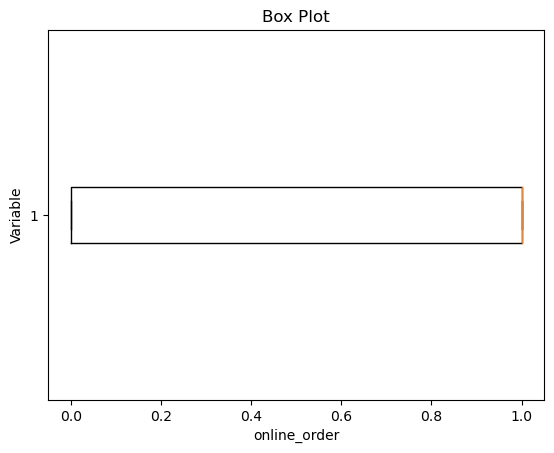

In [18]:
#Checking again outliers on online_order
plt.boxplot(dt1['online_order'], vert=False)
plt.ylabel('Variable')
plt.xlabel('online_order')
plt.title('Box Plot')
plt.show()

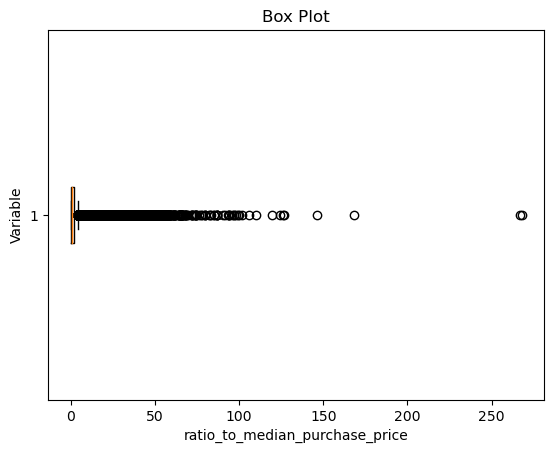

In [19]:
#chekoutliers ratio_to_median_purchase_price
#check individual data
plt.boxplot(dt1['ratio_to_median_purchase_price'], vert=False)
plt.ylabel('Variable')
plt.xlabel('ratio_to_median_purchase_price')
plt.title('Box Plot')
plt.show()

In [20]:
# calculate summary statistics
mean = dt1['ratio_to_median_purchase_price'].mean()
std  = dt1['ratio_to_median_purchase_price'].std()
# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers on ratio_to_median_purchase_price
dt2 = dt1[(dt1['ratio_to_median_purchase_price'] >= lower_bound) 
                & (dt1['ratio_to_median_purchase_price'] <= upper_bound)]

Lower Bound : -3.7749958217330577
Upper Bound : 7.423359778542043


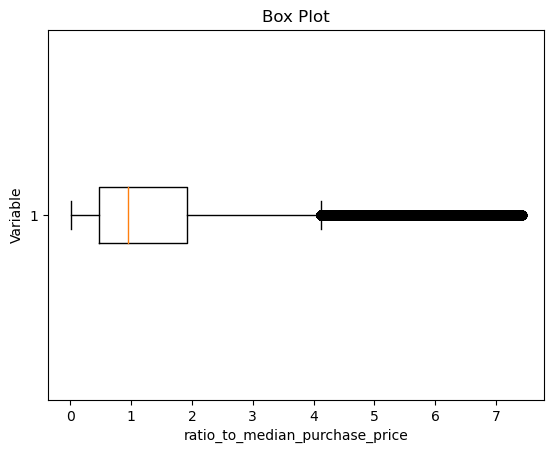

In [21]:
#chekoutliers ratio_to_median_purchase_price
#check individual data
plt.boxplot(dt2['ratio_to_median_purchase_price'], vert=False)
plt.ylabel('Variable')
plt.xlabel('ratio_to_median_purchase_price')
plt.title('Box Plot')
plt.show()

Now let’s look at some of the observations which are shown in the above graphs:

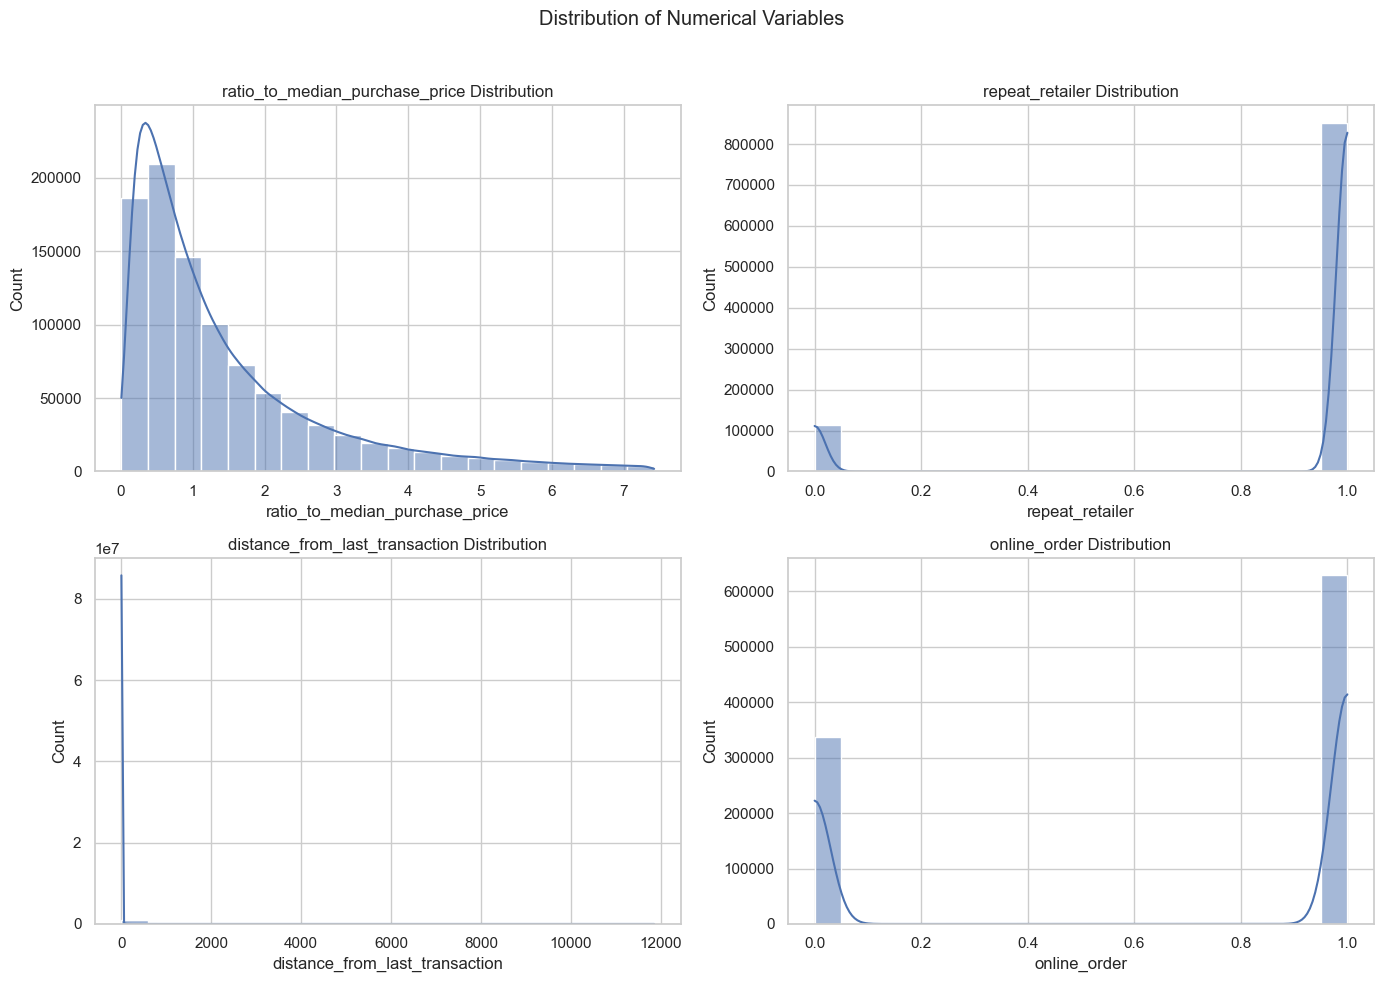

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# Set the style for the visualizations
sns.set(style="whitegrid")
 
# Plot histograms for numerical variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Numerical Variables')
 
sns.histplot(dt2['ratio_to_median_purchase_price'], kde=True, bins=20, ax=axes[0, 0])
axes[0, 0].set_title('ratio_to_median_purchase_price Distribution')
 
sns.histplot(dt2['repeat_retailer'], kde=True, bins=20, ax=axes[0, 1])
axes[0, 1].set_title('repeat_retailer Distribution')
 
sns.histplot(dt2['distance_from_last_transaction'], kde=True, bins=20, ax=axes[1, 0])
axes[1, 0].set_title('distance_from_last_transaction Distribution')
 
sns.histplot(dt2['online_order'], kde=True, bins=20, ax=axes[1, 1])
axes[1, 1].set_title('online_order Distribution')
 
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

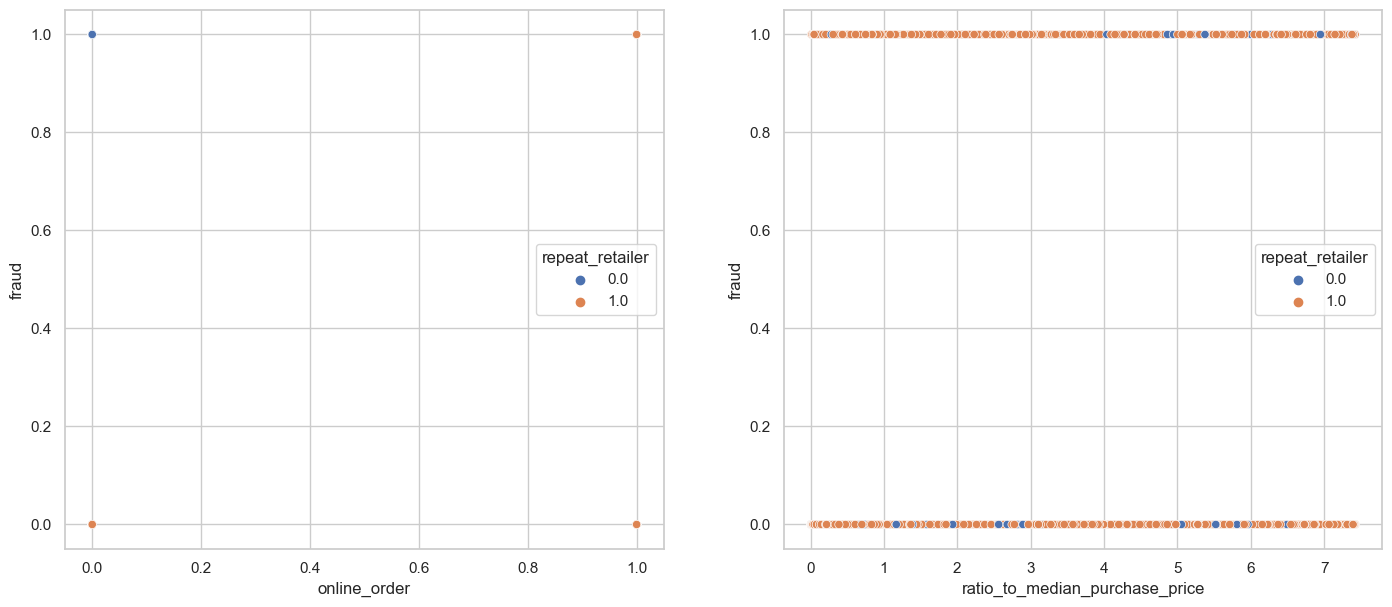

In [23]:
features = ['online_order', 'ratio_to_median_purchase_price']
 
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=dt2, x=col,
                   y='fraud',
                   hue='repeat_retailer')
plt.show()

In [27]:
# Plot bar plots for categorical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribution of Categorical Variables')
 
sns.countplot(x='distance_from_last_transaction', data=dt2, ax=axes[0])
axes[0].set_title('distance_from_last_transaction Distribution')
 
sns.countplot(x='repeat_retailer', data=dt2, ax=axes[1])
axes[1].set_title('repeat_retailer Distribution')
 
sns.countplot(x='ratio_to_median_purchase_price', data=dt2, ax=axes[2])
axes[2].set_title('ratio_to_median_purchase_price Distribution')
 
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x00000136EF656F20>
Traceback (most recent call last):
  File "c:\Users\hp\anaconda3\Lib\site-packages\matplotlib\transforms.py", line 209, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))

KeyboardInterrupt: 


In [ ]:
# Plot box plots for categorical variables vs fraud
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Box Plots of Categorical Variables vs fraud')
 
sns.boxplot(x='ratio_to_median_purchase_price', y='fraud', data=dt2, ax=axes[0])
axes[0].set_title('Gender vs fraud')
 
sns.boxplot(x='repeat_retailer', y='fraud', data=dt2, ax=axes[1])
axes[1].set_title('Smoker vs fraud')
 
sns.boxplot(x='online_order', y='fraud', data=dt2, ax=axes[2])
axes[2].set_title('Region vs fraud')
 
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

In [25]:
# Separate features and target variable
X = dt2.drop(columns=['fraud'])
y = dt2['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers with optimized parameters
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
lr_classifier = LogisticRegression(random_state=42, max_iter=1000, n_jobs=-1)

classifiers = {
    'Random Forest': rf_classifier,
    'Gradient Boosting': gb_classifier,
    'Logistic Regression': lr_classifier
}

In [26]:
# Train and evaluate each classifier
results = {}
for clf_name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    end_time = time.time()
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[clf_name] = {
        'Accuracy': accuracy, 
        'Precision': precision, 
        'Recall': recall, 
        'F1 Score': f1,
        'Training Time': end_time - start_time
    }

# Print the results
print("Algorithm\t\tAccuracy\tPrecision\tRecall\t\tF1 Score\tTraining Time (s)")
print("--------------------------------------------------------------------------")
for clf_name, metrics in results.items():
    print(f"{clf_name}\t\t{metrics['Accuracy']:.4f}\t\t{metrics['Precision']:.4f}\t\t{metrics['Recall']:.4f}\t\t{metrics['F1 Score']:.4f}\t\t{metrics['Training Time']:.2f}")

# Find the best algorithm based on F1 Score
best_algorithm = max(results, key=lambda x: results[x]['F1 Score'])
print(f"\nThe best algorithm for this problem based on F1 Score is: {best_algorithm}")


Algorithm		Accuracy	Precision	Recall		F1 Score	Training Time (s)
--------------------------------------------------------------------------
Random Forest		1.0000		1.0000		0.9999		1.0000		43.75
Gradient Boosting		0.9998		1.0000		0.9965		0.9983		343.16
Logistic Regression		0.9692		0.8672		0.6483		0.7419		8.00

The best algorithm for this problem based on F1 Score is: Random Forest


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib


X = dt2.drop(columns=['fraud'])
y = dt2['fraud']
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9999948252218687


In [35]:
# Save the model to a file
joblib.dump(rf_classifier, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']

NOW LET TRY PREDICTING NO GUI HERE

In [36]:
data = {'distance_from_home':50, 'distance_from_last_transaction':25, 'ratio_to_median_purchase_price':2, 'repeat_retailer':1,'used_chip':0, 'used_pin_number':10, 'online_order':0}

cust_df = pd.DataFrame(data, index)
cust_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,50,25,2,1,0,10,0


In [37]:
fraud_pred = rf_classifier.predict(cust_df)
print("fraud of the new customer is: ", fraud_pred)

fraud of the new customer is:  [0.]


OR BY READING CSV

In [40]:
jaribio=pd.read_csv('/kusoma/data1.csv')

In [41]:
fraud_pred = rf_classifier.predict(jaribio)
print("fraud of the new customer is: ", fraud_pred)

fraud of the new customer is:  [1.]
